In [173]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import gamma, gammaln
import matplotlib.pyplot as plt
import pandas as pd
from math import exp

### We load the parameters from which we want to fit Singh-Maddala law

In [19]:
param_df = pd.read_excel("./parameters/data.xlsx")

In [27]:
param_df.columns = pd.Series(param_df.columns).fillna(method='ffill')
param_df = param_df.drop([0, 7, 8, 9]).rename(columns={'CSP': 'SPC Ratio',
                                                       'Unnamed: 0': 'SPC',
                                                       'Unnamed: 3': "Wage D1",
                                                       'Unnamed: 4': "Wage D5",
                                                       'Unnamed: 5': "Wage D9",
                                                       'Unnamed: 7': "Expenses Ratio",
                                                       'Unnamed: 9': "Estate D1",
                                                       'Unnamed: 10': "Estate D5",
                                                       'Unnamed: 11': "Estate D9"})

### We build the main functions necessary to the fitting: pdf, cdf, mean, plot

In [59]:
quantile_list = ['D1', 'D5', 'D9']

In [123]:
def burr_pdf(x, k, c, l):
    """
    Return the value of the pdf of Singh-Maddala law parameters k, c, l in x

    Parameters
    __________
    x, k, c, l: float

    Returns
    _______
    float
    """
    return ((c*k)/l)*(x/l)**(c-1)*(1+(x/l)**c)**(-k-1)


In [169]:
def burr_mean(k, c, l):
    """
    Returns the mean of Singh-Maddala law parameters k, c, l

    Parameters
    __________
    k, c, l: float

    Returns
    _______
    float
    """
    return exp(gammaln(k-1/c)-gammaln(k))*gamma(1/c)*l/c

In [120]:
def burr_cdf(x, k, c, l):
    """
    Return the value of the cdf of Singh-Maddala law parameters k, c, l in x

    Parameters
    __________
    x, k, c, l: float

    Returns
    _______
    float
    """
    return 1-(1+(x/l)**c)**(-k)

In [174]:
def plot_fit(k, c, l, d_1, d_5, d_9, title):
    """
    Plots the pdf and cdf of Singh-Maddala law with parameters k, c, l
    and draws d_1, d_5 and d_9 deciles

    Parameters
    __________
    k, c, l, d_1, d_5, d_9: float
    title: str

    Returns
    _______
    None
    """
    x = np.arange(1, int(2.5*d_9))
    pdf = (lambda y: burr_pdf(y, k, c, l))(x)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot(x, pdf, label='pdf')
    ax1.set_xlim([0, int(2.5*d_9)])
    ax1.legend()
    cdf = (lambda y: burr_cdf(y, k, c, l))(x)
    ax2.plot(x, cdf, label='cdf')
    ax2.axvline(x=d_1, color='red', linestyle='--', label='D1')
    ax2.axvline(x=d_5, color='orange', linestyle='--', label='D5')
    ax2.axvline(x=d_9, color='green', linestyle='--', label='D9')
    ax2.axhline(y=0.1, color='red', linestyle='--')
    ax2.axhline(y=0.5, color='orange', linestyle='--')
    ax2.axhline(y=0.9, color='green', linestyle='--')
    ax2.legend()
    fig.suptitle(title, fontsize=16)

### For each socio-professional category and for both wage and estate we fit the law

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Lib

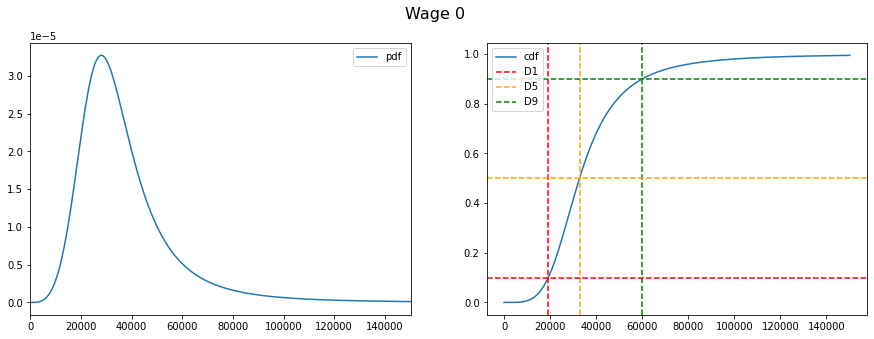

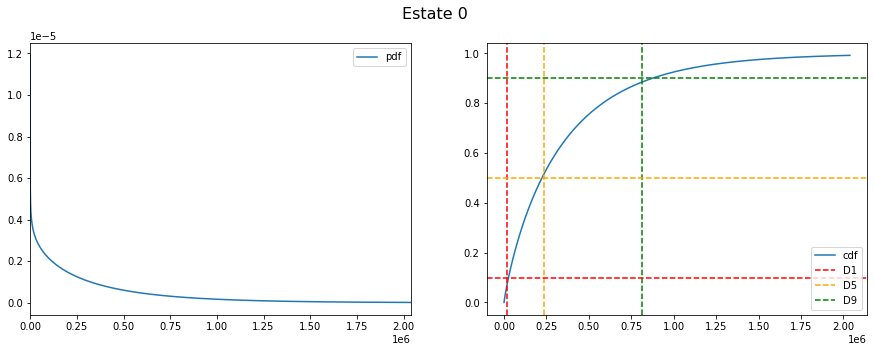

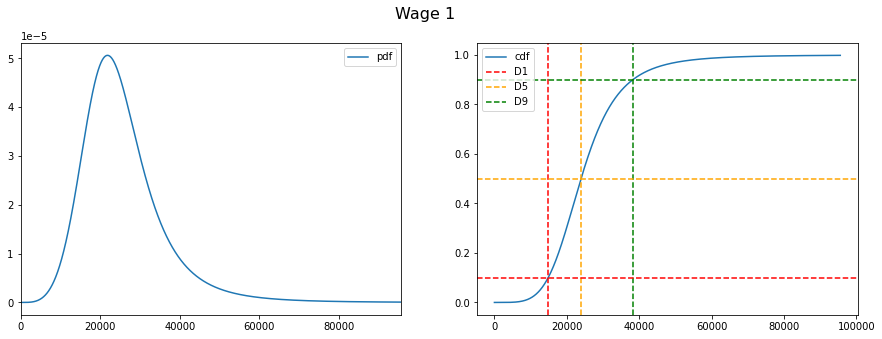

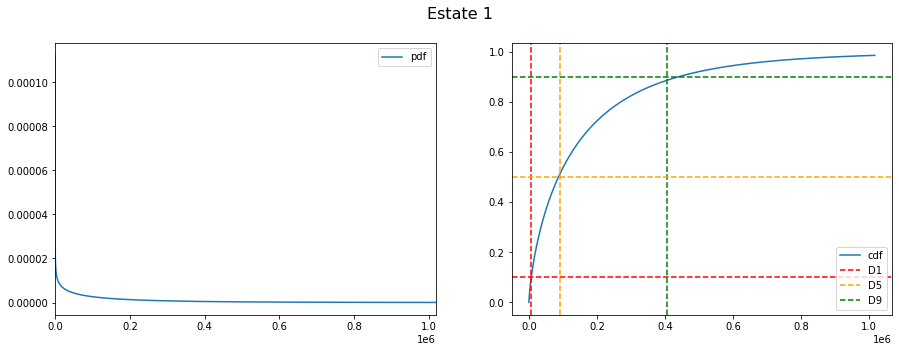

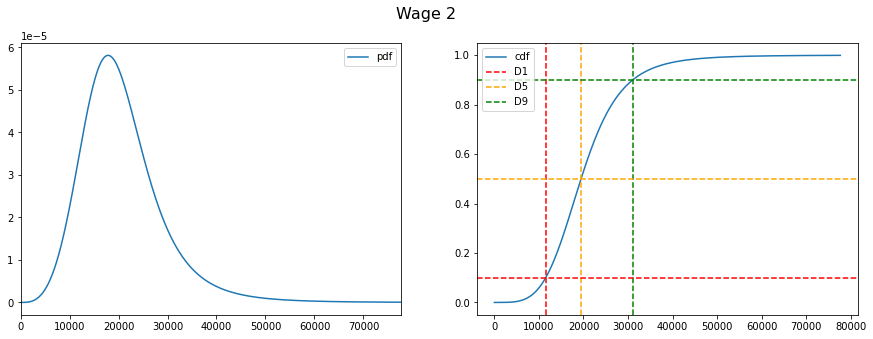

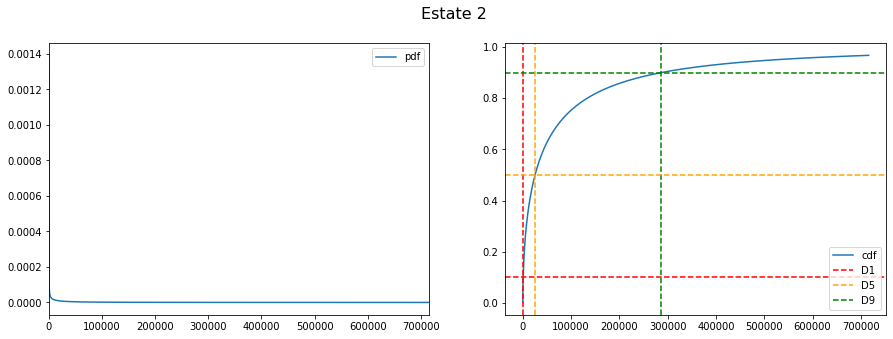

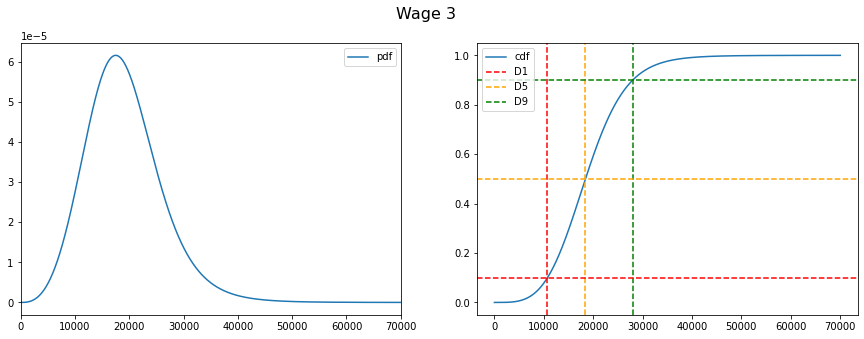

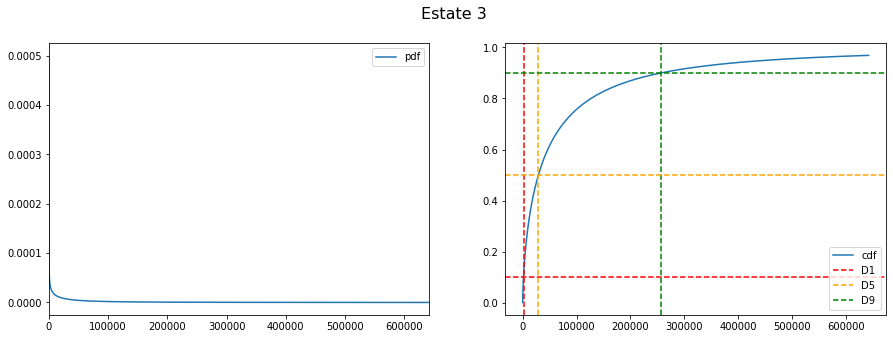

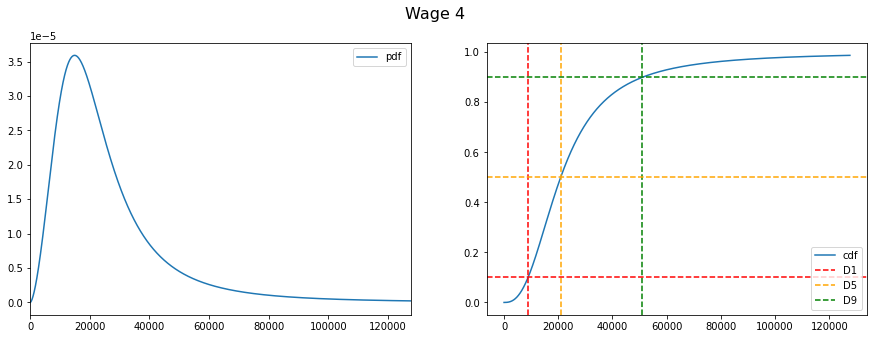

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


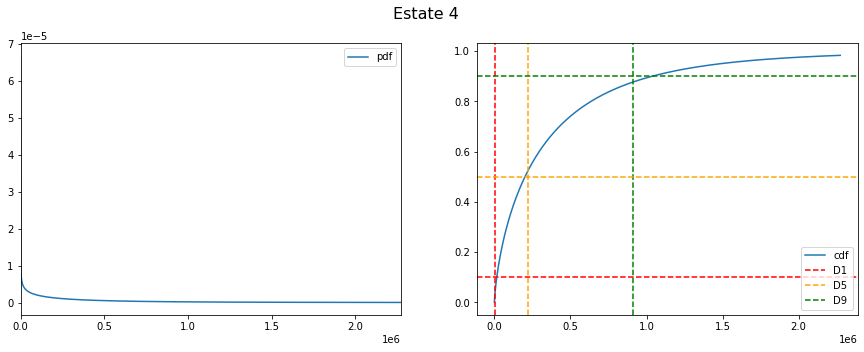

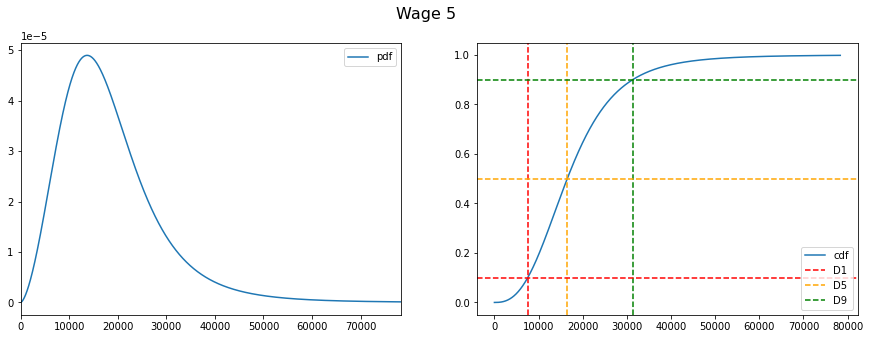

In [181]:
result_dico = {'income': {'k': [], 'c': [], 'l': [], 'mean': []}, 'estate': {'k': [], 'c': [], 'l': [], 'mean': []}}

for i in range(len(param_df)):
    # get paramaters of income distribution
    d_1i, d_5i, d_9i = param_df.iloc[i][['Wage {}'.format(quantile_name) for quantile_name in quantile_list]].to_numpy()
    k_i, c_i, l_i = curve_fit(burr_cdf, [d_1i, d_5i, d_9i], [0.1, 0.5, 0.9])[0]
    plot_fit(k_i, c_i, l_i, d_1i, d_5i, d_9i, 'Wage {}'.format(i))
    result_dico['income']['k'].append(k_i)
    result_dico['income']['c'].append(c_i)
    result_dico['income']['l'].append(l_i)
    result_dico['income']['mean'].append(burr_mean(k_i, c_i, l_i))
    # get paramaters of estate distribution
    d_1e, d_5e, d_9e = param_df.iloc[i][['Estate {}'.format(quantile_name) for quantile_name in quantile_list]].to_numpy()
    k_e, c_e, l_e = curve_fit(burr_cdf, [d_1e, d_5e, d_9e], [0.1, 0.5, 0.9])[0]
    plot_fit(k_e, c_e, l_e, d_1e, d_5e, d_9e, 'Estate {}'.format(i))
    result_dico['estate']['k'].append(k_e)
    result_dico['estate']['c'].append(c_e)
    result_dico['estate']['l'].append(l_e)
    result_dico['estate']['mean'].append(burr_mean(k_e, c_e, l_e))

### We store the corresponding $k, c, \lambda$ parameters in a csv file to reuse them

In [193]:
to_save = pd.DataFrame.from_dict({(outerKey, innerKey): values for outerKey, innerDict in result_dico.items() for innerKey, values in innerDict.items()})
to_save.columns = ['Wage k', 'Wage c', 'Wage l', 'Wage mean', 'Estate k', 'Estate c', 'Estate l', 'Estate mean']
param_df.reset_index(drop=True).join(to_save).to_csv("./parameters/distribution_parameters.csv")